<a href="https://colab.research.google.com/github/sh1nadots/analise-de-dados/blob/main/machinelearning5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [25]:
import pandas as pd


In [26]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [27]:
renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'modelo_ano',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns = renomear)
dados.head()


,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [28]:
troca = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(troca)
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [29]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.modelo_ano
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


transformar milhas em km

In [30]:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [31]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "modelo_ano"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [32]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.score(teste_x, teste_y)

#acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)


A acurácia do dummy stratified foi 46.88%


In [35]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)


A acurácia do dummy mostfrequent foi 58.00%


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.32%


In [38]:
from sklearn.tree import export_graphviz

export_graphviz(modelo)


'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= 59999.074\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[0] <= 40070.154\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="x[0] <= 40723.646\\ngini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="x[0] <= 40644.25\\ngini = 0.441\\nsamples = 61\\nvalue = [20, 41]"] ;\n3 -> 4 ;\n5 [label="x[1] <= 23.5\\ngini = 0.397\\nsamples = 55\\nvalue = [15, 40]"] ;\n4 -> 5 ;\n6 [label="x[0] <= 40086.025\\ngini = 0.346\\nsamples = 45\\nvalue = [10, 35]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n6 -> 7 ;\n8 [label="x[0] <= 40171.676\\ngini = 0.325\\nsamples = 44\\nvalue = [9, 35]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 8]"] ;\n8 -> 9 ;\n10 [lab

In [39]:
from sklearn.tree import export_graphviz

export_graphviz(modelo, out_file=None)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= 59999.074\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[0] <= 40070.154\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="x[0] <= 40723.646\\ngini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="x[0] <= 40644.25\\ngini = 0.441\\nsamples = 61\\nvalue = [20, 41]"] ;\n3 -> 4 ;\n5 [label="x[1] <= 23.5\\ngini = 0.397\\nsamples = 55\\nvalue = [15, 40]"] ;\n4 -> 5 ;\n6 [label="x[0] <= 40086.025\\ngini = 0.346\\nsamples = 45\\nvalue = [10, 35]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n6 -> 7 ;\n8 [label="x[0] <= 40171.676\\ngini = 0.325\\nsamples = 44\\nvalue = [9, 35]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 8]"] ;\n8 -> 9 ;\n10 [lab

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


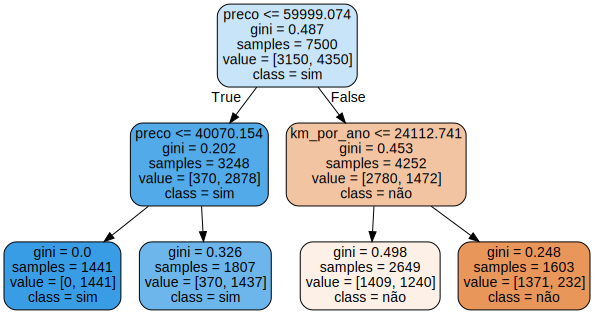

In [42]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico


In [43]:
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [44]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

Treinaremos com 7500 elementos e testaremos com 2500 elementos


In [45]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 79.28%


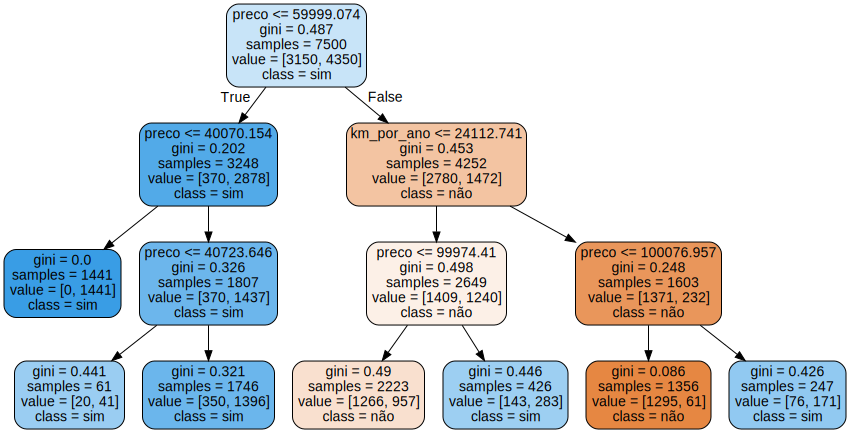

In [46]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico